# (Ford GoBike System Data)
## by (Ahmed Elgayar)

## Preliminary Wrangling

This project is divided into two major parts:

In the first part, we will conduct an exploratory data analysis on our dataset. We will use Python and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part is structured, going from simple univariate relationships up through multivariate relationships.

In the second part, We will take our main findings from our exploration and convey them to others through an explanatory analysis. To this end, We will create a slide deck that leverages polished, explanatory visualizations to communicate your results..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

First i download data from website (https://www.citibikenyc.com/system-data)(https://s3.amazonaws.com/tripdata/index.html)
and then collect them in one folder.
the data that i used in project is for 11 months (from jan to nov)2020.

In [ ]:
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
#import glob

#path = r'C:\Users\Ahmed\Udacity\0- final\csv files' # use your path
#all_files = glob.glob(path + "/*.csv")

#li = []

#for filename in all_files:
    #df = pd.read_csv(filename, index_col=None, header=0)
    #li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
#frame.to_csv('2020-fordgobike-tripdata.csv')

In [2]:
# load the dataset into a dataframe
df_bike = pd.read_csv('2020-fordgobike-tripdata.csv')

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325108 entries, 0 to 325107
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               325108 non-null  int64  
 1   tripduration             325108 non-null  int64  
 2   starttime                325108 non-null  object 
 3   stoptime                 325108 non-null  object 
 4   start station id         325108 non-null  int64  
 5   start station name       325108 non-null  object 
 6   start station latitude   325108 non-null  float64
 7   start station longitude  325108 non-null  float64
 8   end station id           325108 non-null  int64  
 9   end station name         325108 non-null  object 
 10  end station latitude     325108 non-null  float64
 11  end station longitude    325108 non-null  float64
 12  bikeid                   325108 non-null  int64  
 13  usertype                 325108 non-null  object 
 14  birt

In [4]:
df_bike.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [5]:
df_bike.isnull().sum()

Unnamed: 0                 0
tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [6]:
df_bike.duplicated().sum()

0

In [7]:
df_bike.describe()

,Unnamed: 0,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,325108.000000,3.251080e+05,325108.000000,325108.000000,325108.000000,325108.000000,325108.000000,325108.000000,325108.000000,325108.000000,325108.000000
mean,162553.500000,1.581430e+03,3304.063065,40.722202,-74.046739,3302.727232,40.721720,-74.045913,40602.703249,1981.318599,1.096565
std,93850.739995,1.754768e+04,184.693036,0.007361,0.011907,190.198843,0.101270,0.184038,6071.874591,11.032763,0.632435
min,0.000000,6.100000e+01,3184.000000,40.709651,-74.083639,82.000000,0.000000,-74.083639,14531.000000,1888.000000,0.000000
25%,81276.750000,3.280000e+02,3195.000000,40.716870,-74.051789,3195.000000,40.716870,-74.050656,42141.000000,1969.000000,1.000000
50%,162553.500000,6.220000e+02,3209.000000,40.721124,-74.043991,3209.000000,40.721124,-74.043845,42371.000000,1984.000000,1.000000
75%,243830.250000,1.439000e+03,3276.000000,40.727224,-74.037683,3276.000000,40.727224,-74.037683,43206.000000,1990.000000,2.000000
max,325107.000000,3.261756e+06,3792.000000,40.748716,-74.032108,4069.000000,40.848282,0.000000,49058.000000,2004.000000,2.000000


#### Data Assessing and Cleaning
1. Remove unnecessary columns.
2. change tripduration to tripduration_min & tripduration_hour.
3. Change values in gender column to ( Male , Female , Unknown).
4. Check member age and drop unnecessary age.
5. Change start time and end time to datetime.
6. Change user type and gender to category type
7. Extract months and days from start time 

In [30]:
df_bike_clean = df_bike.copy()

In [31]:
# drop columns that we dont need
columns = ['Unnamed: 0','start station latitude','start station longitude','end station latitude','end station longitude','start station id','end station id','bikeid']
df_bike_clean.drop(columns, inplace=True, axis=1)

In [32]:
#change duration_sec to minutes
df_bike_clean['tripduration_min'] = df_bike_clean['tripduration'] / 60

In [33]:
#change duration_sec to minutes
df_bike_clean['tripduration_hour'] = df_bike_clean['tripduration_min'] / 60

In [34]:
# Change values in gender column
df_bike_clean['gender'].replace(1, 'Male',inplace=True)
df_bike_clean['gender'].replace(2, 'Female',inplace=True)
df_bike_clean['gender'].replace(0, 'Unknown',inplace=True)

In [35]:
df_bike_clean.head()

,tripduration,starttime,stoptime,start station name,end station name,usertype,birth year,gender,tripduration_min,tripduration_hour
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,Grove St PATH,Newark Ave,Subscriber,1984,Female,3.766667,0.062778
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,Grove St PATH,Brunswick & 6th,Subscriber,1989,Female,6.283333,0.104722
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,Grove St PATH,Brunswick & 6th,Customer,1989,Male,4.800000,0.080000
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,Sip Ave,Astor Place,Customer,1969,Unknown,7.250000,0.120833
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,Grove St PATH,Marin Light Rail,Subscriber,1983,Female,3.850000,0.064167


In [36]:
#Check member age
df_bike_clean['member_age'] = 2020-df_bike_clean['birth year'].astype('int')

In [37]:
df_bike_clean['member_age'].describe()

count    325108.000000
mean         38.681401
std          11.032763
min          16.000000
25%          30.000000
50%          36.000000
75%          51.000000
max         132.000000
Name: member_age, dtype: float64

In [38]:
df_bike_clean['member_age'].value_counts()

51     51138
31     16422
30     14886
29     14153
32     14038
       ...  
81         2
87         2
78         1
82         1
100        1
Name: member_age, Length: 70, dtype: int64

In [39]:
# Remove ages more than 90 years
df_over80 = df_bike_clean[df_bike_clean['member_age'] > 90]

In [40]:
df_bike_clean= df_bike_clean.drop(df_over80.index, axis=0)

In [41]:
#check values
df_bike_clean['member_age'].describe()

count    325087.000000
mean         38.675545
std          11.008872
min          16.000000
25%          30.000000
50%          36.000000
75%          51.000000
max          90.000000
Name: member_age, dtype: float64

In [42]:
#change start time and stop time to datetime
df_bike_clean['starttime'] = pd.to_datetime(df_bike_clean['starttime'])
df_bike_clean['stoptime'] = pd.to_datetime(df_bike_clean['stoptime'])

In [43]:
#change user type and gender to category type
df_bike_clean['usertype'] = df_bike_clean['usertype'].astype('category')
df_bike_clean['gender'] = df_bike_clean['gender'].astype('category')

In [44]:
#check for changes
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325087 entries, 0 to 325107
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   tripduration        325087 non-null  int64         
 1   starttime           325087 non-null  datetime64[ns]
 2   stoptime            325087 non-null  datetime64[ns]
 3   start station name  325087 non-null  object        
 4   end station name    325087 non-null  object        
 5   usertype            325087 non-null  category      
 6   birth year          325087 non-null  int64         
 7   gender              325087 non-null  category      
 8   tripduration_min    325087 non-null  float64       
 9   tripduration_hour   325087 non-null  float64       
 10  member_age          325087 non-null  int32         
dtypes: category(2), datetime64[ns](2), float64(2), int32(1), int64(2), object(2)
memory usage: 24.2+ MB


In [45]:
#Extract months and days from start time 
df_bike_clean['month'] = df_bike_clean.starttime.dt.strftime('%b')
df_bike_clean['day'] = df_bike_clean.starttime.dt.strftime('%a')

In [46]:
df_bike_clean.head(5)

,tripduration,starttime,stoptime,start station name,end station name,usertype,birth year,gender,tripduration_min,tripduration_hour,member_age,month,day
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,Subscriber,1984,Female,3.766667,0.062778,36,Jan,Wed
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,Subscriber,1989,Female,6.283333,0.104722,31,Jan,Wed
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,Customer,1989,Male,4.800000,0.080000,31,Jan,Wed
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,Sip Ave,Astor Place,Customer,1969,Unknown,7.250000,0.120833,51,Jan,Wed
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,Subscriber,1983,Female,3.850000,0.064167,37,Jan,Wed


In [47]:
df_bike_clean.month.value_counts()

Oct    43537
Aug    43265
Sep    40382
Jul    38680
Jun    36921
Jan    26006
May    25076
Feb    22958
Nov    21275
Mar    17719
Apr     9268
Name: month, dtype: int64

In [48]:
for col in df_bike.columns: 
    print(col) 

Unnamed: 0
tripduration
starttime
stoptime
start station id
start station name
start station latitude
start station longitude
end station id
end station name
end station latitude
end station longitude
bikeid
usertype
birth year
gender


### What is the structure of your dataset?
The dataset contains 325107 entries with 15 features including :
1. tripduration
2. starttime
3. stoptime
4. start station id
5. start station name
6. start station latitude
7. start station longitude
8. end station id
9. end station name
10. end station latitude
11. end station longitude
12. bikeid
13. usertype
14. birth year
15. gender

### What is/are the main feature(s) of interest in your dataset?
the relationship between duration and (gender , age , user type)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
the duration the trip will be helpful in comparing with gender and user type .

## Univariate Exploration

In [49]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_order = pd.api.types.CategoricalDtype(ordered = True,categories = months)
df_bike_clean['month'] = df_bike_clean['month'].astype(month_order)
df_bike_clean.groupby('month')['usertype'].count()

month
Jan    26006
Feb    22958
Mar    17719
Apr     9268
May    25076
Jun    36921
Jul    38680
Aug    43265
Sep    40382
Oct    43537
Nov    21275
Dec        0
Name: usertype, dtype: int64

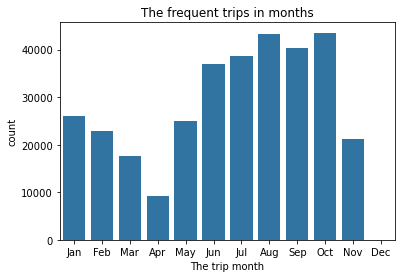

In [50]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike_clean, x='month', color=base_color);
plt.xlabel('The trip month')
plt.title('The frequent trips in months');

The number of trips are increased in (may to oct) this months of summer in the first months of the year the trips are decreased because to winter

In [51]:
days_order = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
days = pd.api.types.CategoricalDtype(ordered = True,categories = days_order)
df_bike_clean['day'] = df_bike_clean['day'].astype(days)
df_bike_clean.groupby('day')['usertype'].count()

day
Sat    55725
Sun    50479
Mon    41290
Tue    44052
Wed    44362
Thu    44274
Fri    44905
Name: usertype, dtype: int64

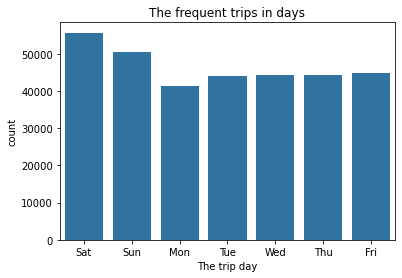

In [52]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_bike_clean, x='day', color=base_color);
plt.xlabel('The trip day')
plt.title('The frequent trips in days');

weekends have more trips more than weekdays 

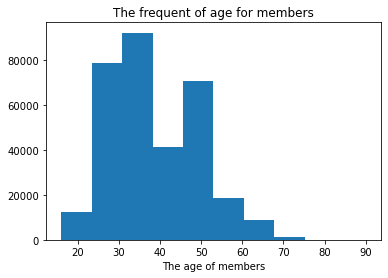

In [53]:
base_color = sb.color_palette()[0]
plt.hist(data=df_bike_clean, x='member_age', color=base_color);
plt.xlabel('The age of members')
plt.title('The frequent of age for members');

people that have (25 to 35) are the most members to make trips 

In [54]:
gender_counts = df_bike_clean['gender'].value_counts()
print(gender_counts)

Male       192039
Female      82230
Unknown     50818
Name: gender, dtype: int64


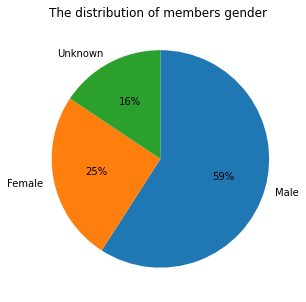

In [55]:
plt.figure(figsize=[8, 5])
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False);
plt.title("The distribution of members gender ");

males have the largest proportion then females come

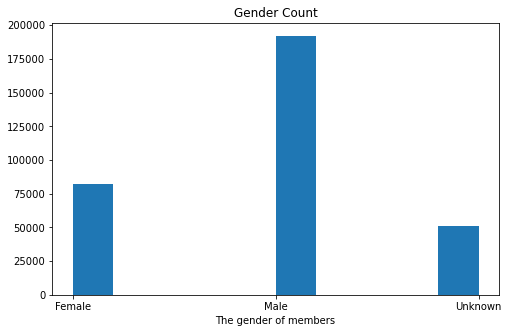

In [81]:
plt.figure(figsize=[8, 5])
plt.hist(data=df_bike_clean, x='gender');
plt.xlabel('The gender of members')
plt.title('Gender Count');

In [57]:
user_counts = df_bike_clean['usertype'].value_counts()
print(user_counts)

Subscriber    222107
Customer      102980
Name: usertype, dtype: int64


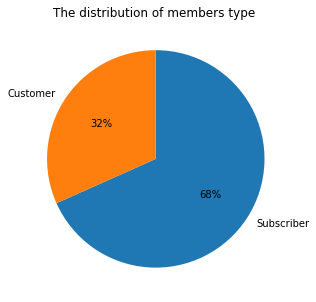

In [58]:
plt.figure(figsize=[8, 5])
plt.pie(user_counts, labels = user_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False);
plt.title("The distribution of members type ");

The subscribers have larger proportion then the customers

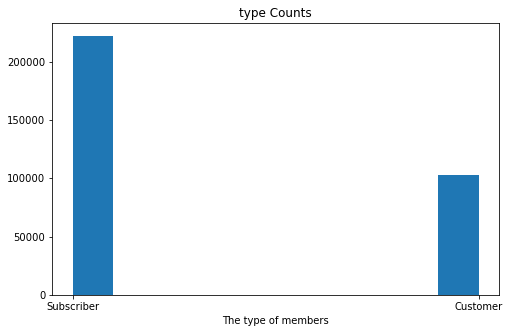

In [59]:
plt.figure(figsize=[8, 5])
plt.hist(data=df_bike_clean, x='usertype');
plt.xlabel('The type of members')
plt.title('type Counts');

In [60]:
df_bike_clean['tripduration_min'].describe()

count    325087.000000
mean         26.358589
std         292.470712
min           1.016667
25%           5.466667
50%          10.366667
75%          23.983333
max       54362.600000
Name: tripduration_min, dtype: float64

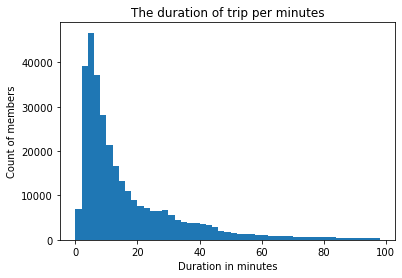

In [61]:
# i use values under 100 min and avoid outliers
bins = np.arange(0, 100, 2)
plt.hist(data = df_bike_clean, x = 'tripduration_min', bins = bins)
plt.title("The duration of trip per minutes")
plt.xlabel('Duration in minutes')
plt.ylabel('Count of members');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- there are some missing data that must be checked , there are outliers in duration of trip and age have to be cleaned , there is a large percentage of unknown gender that we need to know them.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- in age distribution there is something wrong that in age of (48 to 52 there is increase ), in distribution of days the weekends are more than weekdays i think there's something wrong


## Bivariate Exploration

In [62]:
df_bike_clean.head()

,tripduration,starttime,stoptime,start station name,end station name,usertype,birth year,gender,tripduration_min,tripduration_hour,member_age,month,day
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,Subscriber,1984,Female,3.766667,0.062778,36,Jan,Wed
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,Subscriber,1989,Female,6.283333,0.104722,31,Jan,Wed
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,Customer,1989,Male,4.800000,0.080000,31,Jan,Wed
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,Sip Ave,Astor Place,Customer,1969,Unknown,7.250000,0.120833,51,Jan,Wed
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,Subscriber,1983,Female,3.850000,0.064167,37,Jan,Wed


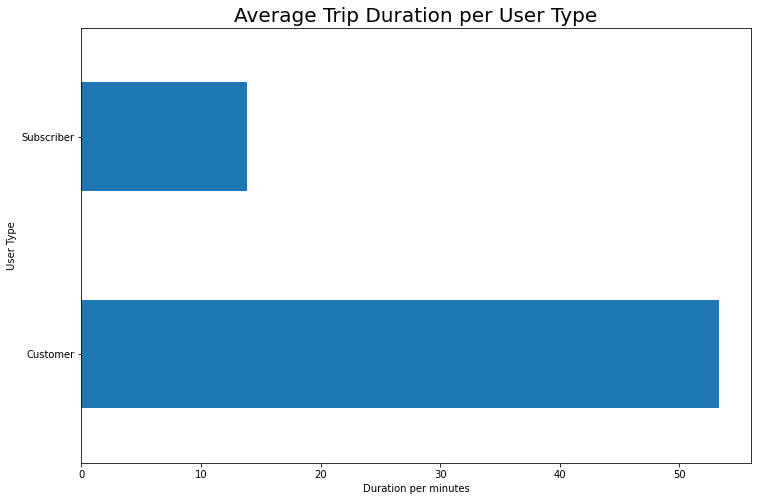

In [63]:
plt.figure(figsize=[12, 8])
duration_type = df_bike_clean.groupby('usertype')['tripduration_min'].mean().plot(kind='barh')
duration_type.set_title('Average Trip Duration per User Type',fontsize=20)
duration_type.set_ylabel('User Type')
duration_type.set_xlabel('Duration per minutes');

this figure shows that the duration for customer is larger than subscriber 

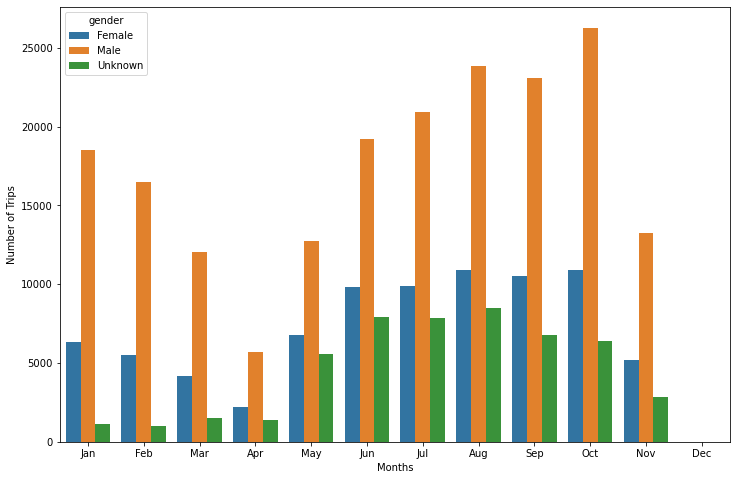

In [64]:
plt.figure(figsize=[12, 8])
sb.countplot(data=df_bike_clean, x='month', hue='gender');
plt.xlabel('Months');
plt.ylabel('Number of Trips');

this figure shows that all genders's trips are decresed in frist 4 months of year that is winter , after that they are incresed in months of summer  

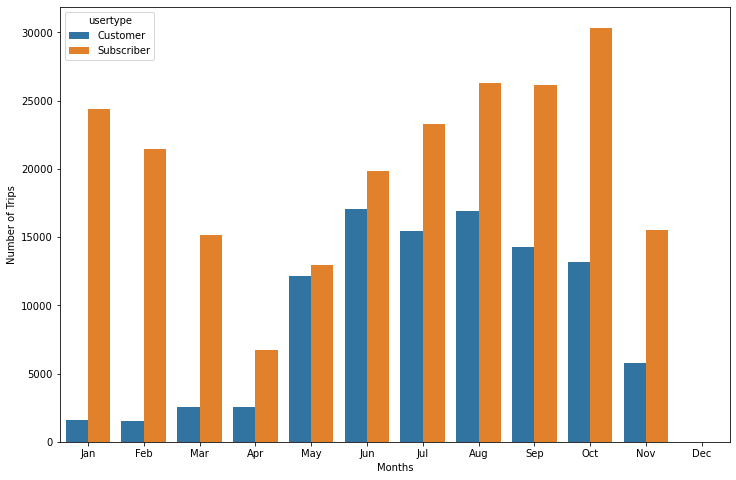

In [76]:
plt.figure(figsize=[12, 8])
sb.countplot(data=df_bike_clean, x='month', hue='usertype');
plt.xlabel('Months');
plt.ylabel('Number of Trips');

this figure shows that all usertype's trips are decresed in frist 4 months of year that is winter , after that they are incresed in months of summer  

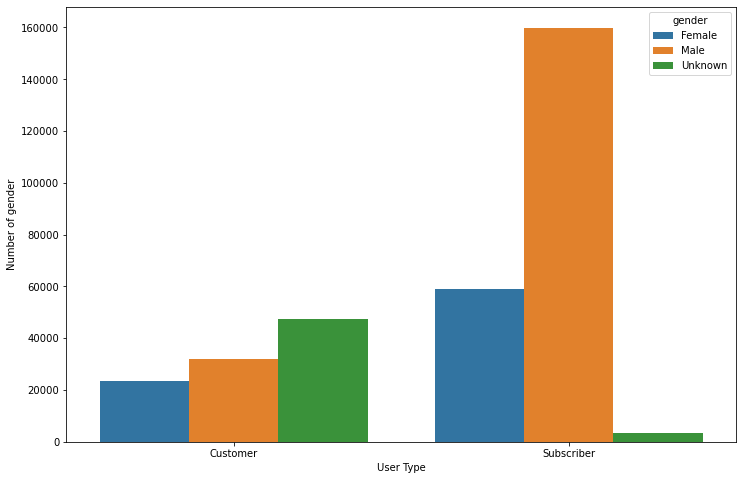

In [67]:
plt.figure(figsize=[12, 8])
sb.countplot(data=df_bike_clean, x='usertype', hue='gender')
plt.xlabel('User Type');
plt.ylabel('Number of gender');

the subscriber member , males are the largest one , in customer members unknown is the largest so we have to identify them

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x576 with 0 Axes>

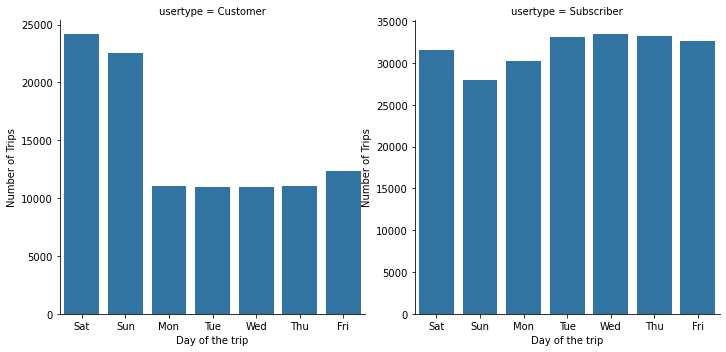

In [68]:
plt.figure(figsize=[12, 8])
g = sb.FacetGrid(data=df_bike_clean,col='usertype', col_wrap = 2, height = 5, sharey=False)
g.map(sb.countplot, 'day')
for i in range(2):
    g.axes[i].set_xlabel('Day of the trip')
    g.axes[i].set_ylabel('Number of Trips')

the customers use trips more in weekends , the subscribers use trips more in weekdays

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x576 with 0 Axes>

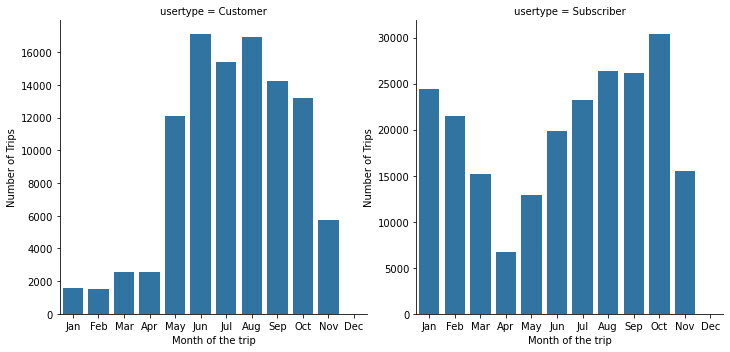

In [69]:
plt.figure(figsize=[12, 8])
g = sb.FacetGrid(data=df_bike_clean,col='usertype', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'month')
for i in range(2):
    g.axes[i].set_xlabel('Month of the trip')
    g.axes[i].set_ylabel('Number of Trips')

the most usage of customer is in jun and aug while the most usage of subscriber in oct

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x576 with 0 Axes>

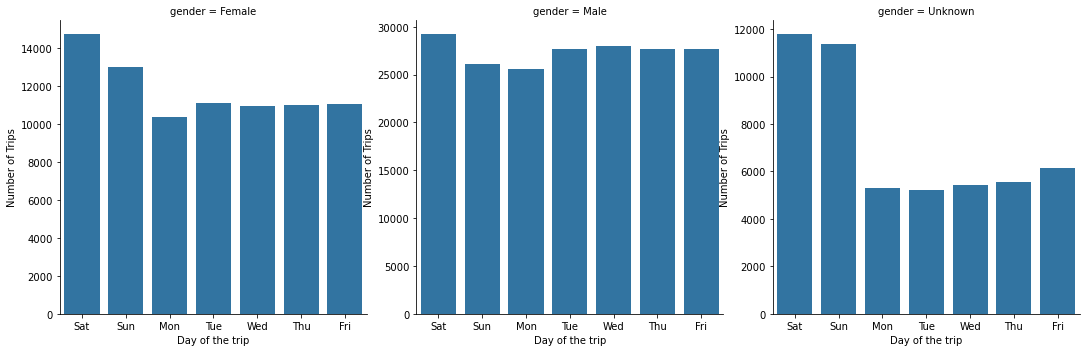

In [70]:
plt.figure(figsize=[12, 8])
g = sb.FacetGrid(data=df_bike_clean,col='gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'day')
for i in range(3):
    g.axes[i].set_xlabel('Day of the trip')
    g.axes[i].set_ylabel('Number of Trips')

females use trips most in weekend and low usage in weekday , males use trips all days of week

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x576 with 0 Axes>

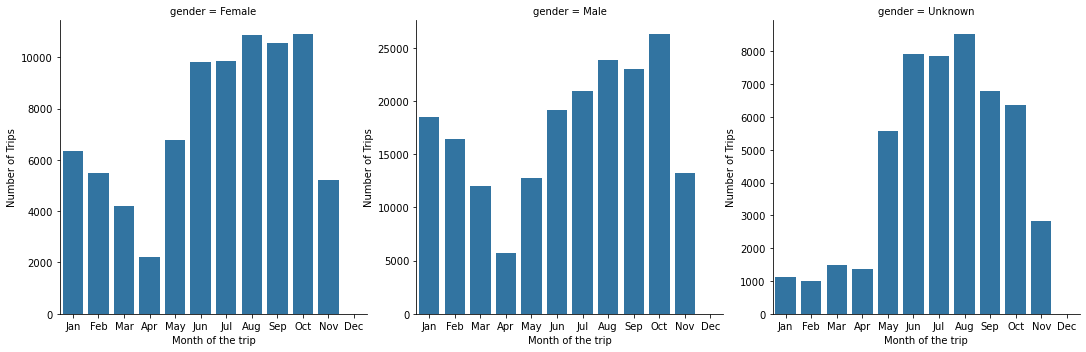

In [71]:
plt.figure(figsize=[12, 8])
g = sb.FacetGrid(data=df_bike_clean,col='gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'month')
for i in range(3):
    g.axes[i].set_xlabel('Month of the trip')
    g.axes[i].set_ylabel('Number of Trips')

the figure shows that females use trips more than males in summer .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
the most usage of trips is male , and trips increase in summer months, customers use the trips longer than subscribers 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

the usage of trips for female and unknown are decreased in weekdays and customers also.

## Multivariate Exploration

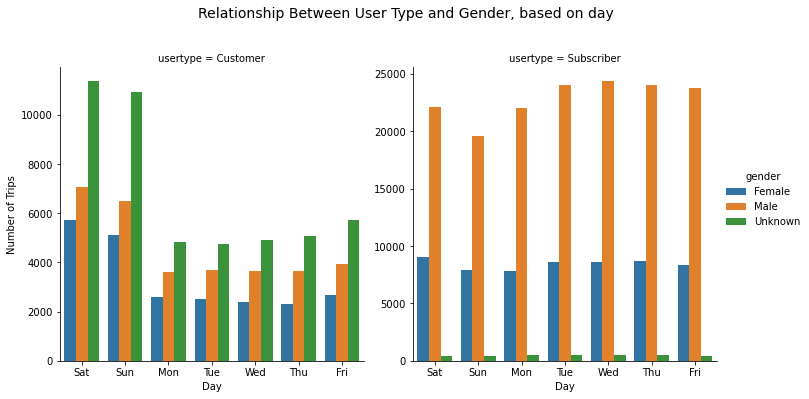

In [72]:
g = sb.catplot(data=df_bike_clean, x='day', col="usertype", hue='gender', kind='count', sharey = False)
g.set_axis_labels("Day", "Number of Trips")
g.fig.suptitle('Relationship Between User Type and Gender, based on day',fontsize=14,y=1.1);

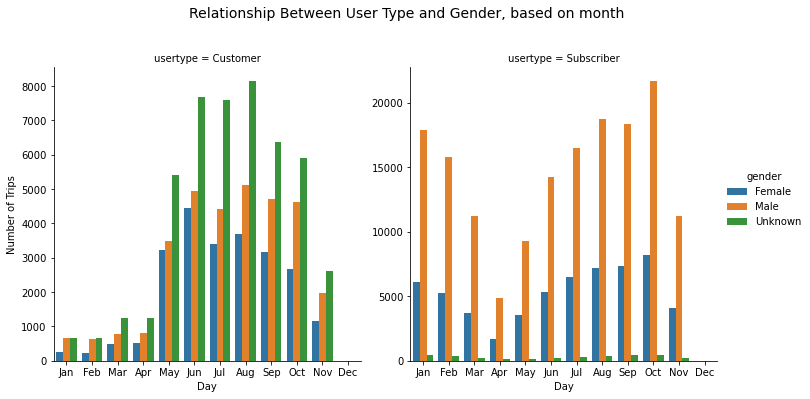

In [73]:
g = sb.catplot(data=df_bike_clean, x='month', col="usertype", hue='gender', kind='count', sharey = False)
g.set_axis_labels("Day", "Number of Trips")
g.fig.suptitle('Relationship Between User Type and Gender, based on month',fontsize=14,y=1.1);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customer members use trips more in weekdays and unknown gender are the most in this , and in summer months the unknown customer members are the most in using the trips , the male subscriber members are the most in using trips in weekdays and weekends , they are the most in all months and usage increases in summer months .

### Were there any interesting or surprising interactions between features?

the unknown gender affect your data so we have to identify it or clean it from our data

In [78]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0

In [80]:
# save the cleaned dataset for explanatory data analysis
df_bike_clean.to_csv('data_cleaned.csv')